## Задание по библиотекам Pandas и Matplotlib
### Лабораторная работа № 4 по дисциплине "Технологии программирования"
#### Индивидуальное задание: Вариант 3

Подключаем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Скачиваем датасет с информацией о пассажирах Титаника:

In [2]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2023-11-27 20:39:59--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K   163KB/s    in 0.3s    

2023-11-27 20:40:00 (163 KB/s) - ‘titanic.csv’ saved [44225/44225]



Проверяем наличие скачанного датасета:



In [3]:
!ls

docker-compose.yml	   lab4_TP_Pandas_Tasks.ipynb
lab4_TP_NumPy_Tasks.ipynb  titanic.csv


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [4]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [5]:
missing_values = df.isnull().any()

print(missing_values)

Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool


2. В соответствии с вариантом, определите: 
<b>Вариант 3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.</b>

In [6]:
children_in_first_class = df[(df['Age'] < 12) & (df['Pclass'] == 1) & (df['Survived'] == 0)]

num_deceased_children_in_first_class = children_in_first_class.shape[0]

print(f'Число погибших детей до 12 лет, путешествующих первым классом: {num_deceased_children_in_first_class}')

Число погибших детей до 12 лет, путешествующих первым классом: 1


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

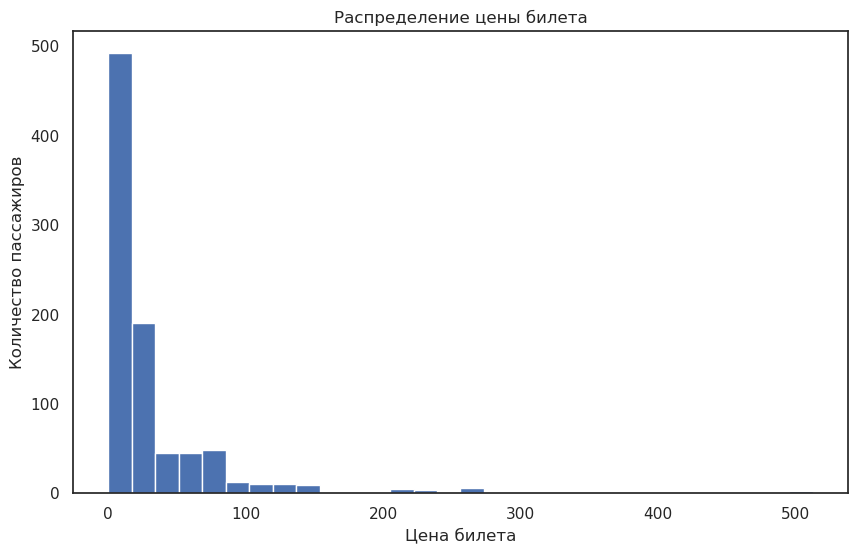

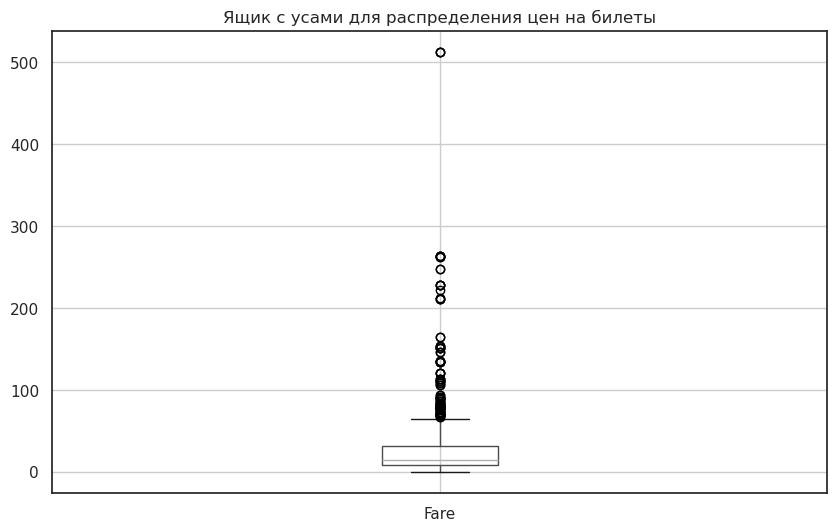

In [7]:
#Установка стиля
sns.set(style="white")

#Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=30)
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')
plt.title('Распределение цены билета')
plt.show()

#Выбросы
df.boxplot('Fare', figsize=(10, 6))
plt.title('Ящик с усами для распределения цен на билеты')
plt.show()

#### Из гистограммы видно что большинство пассажиров покупают билеты в диапозоне ~1-20 в фунтах стерлингов. Из ящика с усами видно что все те, кто покупают билет > 20 футов стерлингов считаются "выбросом", т.к. есть точки, которые находятся за интерквартильным размахом

4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа: <b>Вариант 3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.</b>

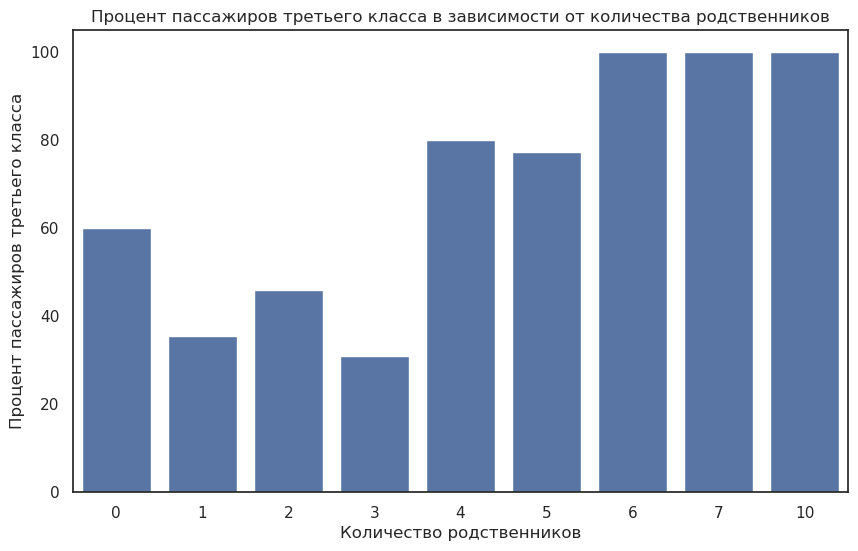

In [8]:
# Новая колонка - Родственники (братья/сестры/супруг + родители/дети)
df['Relatives'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']

# Считаем процент пассажиров третьего класса для всех родственников
percentage = df[df['Pclass'] == 3].groupby('Relatives')['Pclass'].count() / df.groupby('Relatives')['Pclass'].count() * 100

# Строим график
sns.set(style="white")
plt.figure(figsize=(10,6))
sns.barplot(x=percentage.index, y=percentage.values)
plt.title('Процент пассажиров третьего класса в зависимости от количества родственников')
plt.xlabel('Количество родственников')
plt.ylabel('Процент пассажиров третьего класса')
plt.show()

#### Как видно из графика, утверждение считается верным, т.к. при самом наибольшем количестве родственников (6, 7 и 10) имеется 100% пассажиров с билетом третьего класса

5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [9]:
df = df.drop('Name', axis=1)
print(df)
df

     Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
0           0       3    male  22.0                        1   
1           1       1  female  38.0                        1   
2           1       3  female  26.0                        0   
3           1       1  female  35.0                        1   
4           0       3    male  35.0                        0   
..        ...     ...     ...   ...                      ...   
882         0       2    male  27.0                        0   
883         1       1  female  19.0                        0   
884         0       3  female   7.0                        1   
885         1       1    male  26.0                        0   
886         0       3    male  32.0                        0   

     Parents/Children Aboard     Fare  Relatives  
0                          0   7.2500          1  
1                          0  71.2833          1  
2                          0   7.9250          0  
3                          

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Relatives
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,0
883,1,1,female,19.0,0,0,30.0000,0
884,0,3,female,7.0,1,2,23.4500,3
885,1,1,male,26.0,0,0,30.0000,0


6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [10]:
df_encoded = pd.get_dummies(df, columns=['Sex'])
print(df_encoded)

     Survived  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0           0       3  22.0                        1                        0   
1           1       1  38.0                        1                        0   
2           1       3  26.0                        0                        0   
3           1       1  35.0                        1                        0   
4           0       3  35.0                        0                        0   
..        ...     ...   ...                      ...                      ...   
882         0       2  27.0                        0                        0   
883         1       1  19.0                        0                        0   
884         0       3   7.0                        1                        2   
885         1       1  26.0                        0                        0   
886         0       3  32.0                        0                        0   

        Fare  Relatives  Se

7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

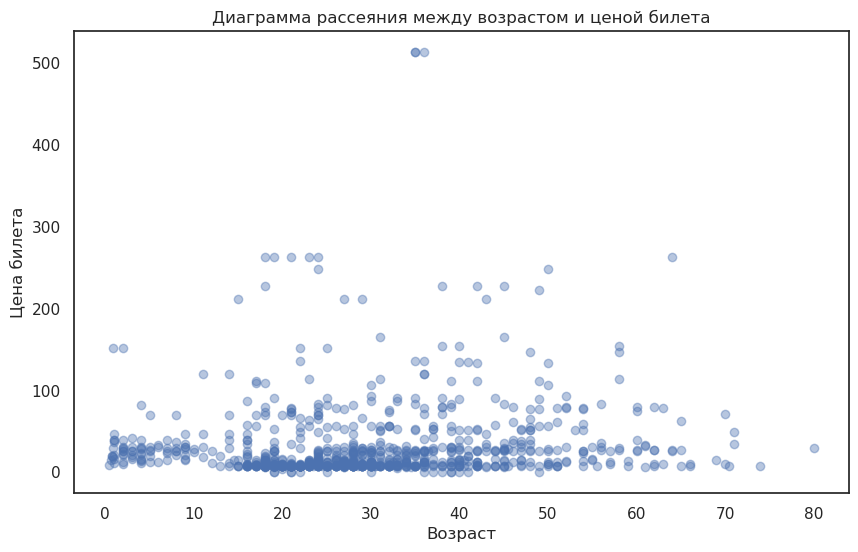

In [11]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.4)
plt.title('Диаграмма рассеяния между возрастом и ценой билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.show()

#### Из диаграммы рассеяния видно каждую строку из датафрейма в виде точки на графике. Из графика видно что большинство покупают дешевый билет в любом возврасте. Только двое в возврасте 30-40 лет купили самый дорогой билет. Немногие покупают билет из диапозона 200-300 футов стерлингов в возврасте от 10-70 лет. Никаких закономерностей не было найдено.

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [12]:
scaler = MinMaxScaler()

#Нормируем (диапозон 0-1, где 0 - min, а 1 - max)
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df)

     Survived  Pclass     Sex       Age  Siblings/Spouses Aboard  \
0           0       3    male  0.271174                        1   
1           1       1  female  0.472229                        1   
2           1       3  female  0.321438                        0   
3           1       1  female  0.434531                        1   
4           0       3    male  0.434531                        0   
..        ...     ...     ...       ...                      ...   
882         0       2    male  0.334004                        0   
883         1       1  female  0.233476                        0   
884         0       3  female  0.082684                        1   
885         1       1    male  0.321438                        0   
886         0       3    male  0.396833                        0   

     Parents/Children Aboard      Fare  Relatives  
0                          0  0.014151          1  
1                          0  0.139136          1  
2                          

9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

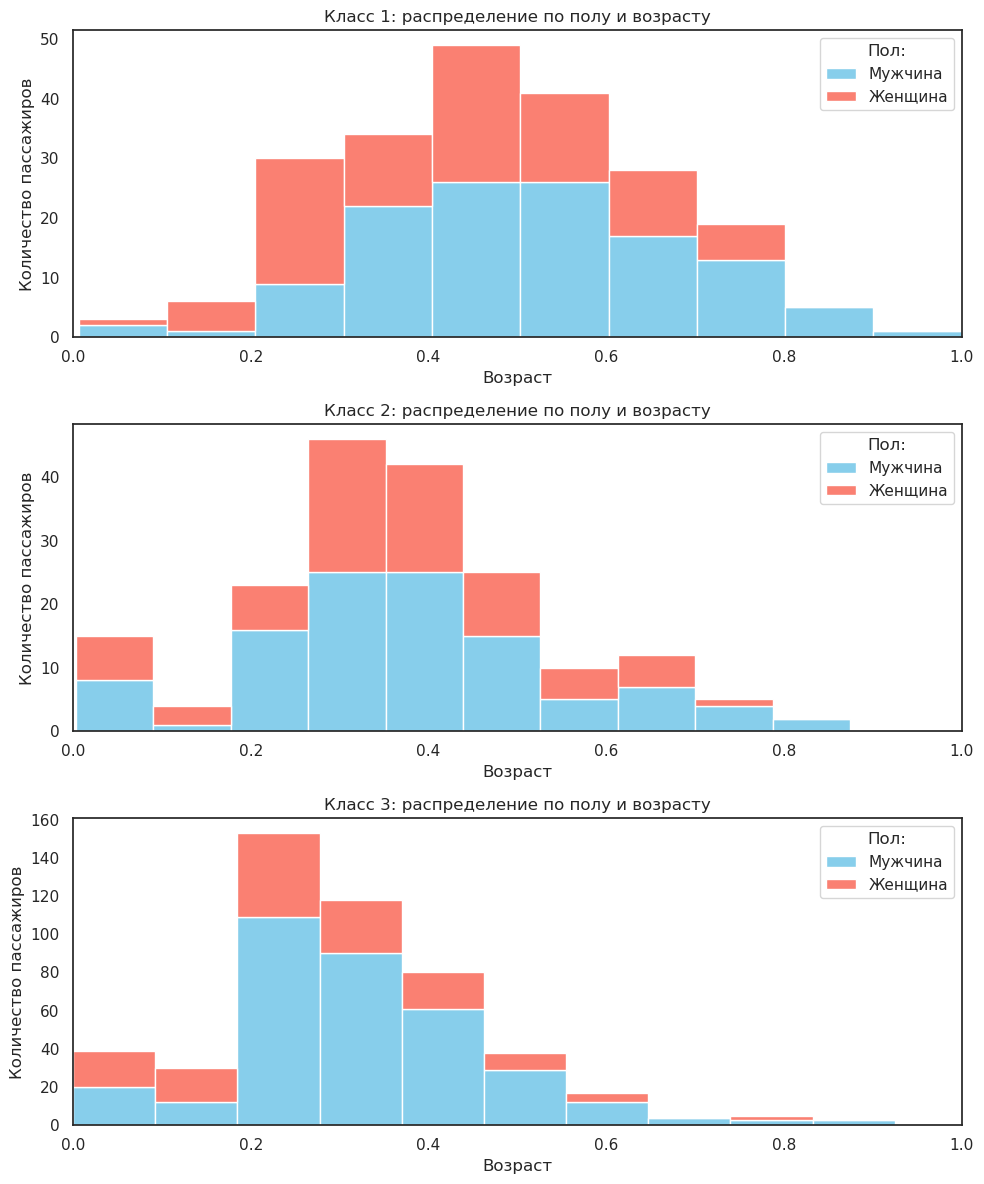

In [13]:
# Создание подграфиков
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Построение гистограмм распределения пассажиров по полу и возрасту для каждого класса
for i in range(1, 4):
    ax = axes[i-1]
    df_class = df[df['Pclass'] == i]
    ax.hist([df_class[df_class['Sex'] == 'male']['Age'], df_class[df_class['Sex'] == 'female']['Age']], bins=10, stacked=True, color=['skyblue', 'salmon'])
    ax.set_title(f'Класс {i}: распределение по полу и возрасту')
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Количество пассажиров')
    ax.legend(title='Пол:', labels=['Мужчина', 'Женщина'])
    ax.set_xlim(0, df['Age'].max())  # Установка общего диапазона значений по оси X

# Устранение перекрытия
plt.tight_layout()
plt.show()


10. Сделайте выводы по работе.

### Выводы:
#### В ходе лабораторной работы был проанализован датасет "titanic.csv". Я научился работать с датасетом, подключать необходимые библиотеки, проверять значения и наличие пропущенных значений датасета. Фильтровать фрейм, создавать гистограммы, различные диаграммы и проверять выбросы. Изменять колонки датасета, а именно: Удалять, кодировать с помощью ohe-hot-кодирования, отномировывать значения.